In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import YearLocator, DateFormatter
plt.style.use("default")

In [3]:
performance_df = pd.read_csv("../Results/Performance over time for model v15b.csv")

In [4]:
performance_df[-100:]

,day,R squared total,R squared predictive
1435,2021-11-22,0.211757,0.001790
1436,2021-11-23,0.210366,0.001917
1437,2021-11-24,0.208628,0.002021
1438,2021-11-25,0.203791,0.001695
1439,2021-11-26,0.201561,0.001383
...,...,...,...
1530,2022-02-25,0.217986,0.027420
1531,2022-02-26,0.221875,0.027144
1532,2022-02-27,0.221369,0.027120
1533,2022-02-28,0.225158,0.028246


In [91]:
performance_df[performance_df["R squared predictive"] < 0]

,day,R squared total,R squared predictive
891,2020-05-27,0.336440,-0.002657
892,2020-05-28,0.335596,-0.001885
893,2020-05-29,0.335412,-0.003035
894,2020-05-30,0.334837,-0.003177
895,2020-05-31,0.335020,-0.004461
...,...,...,...
1420,2021-11-07,0.211174,-0.001845
1421,2021-11-08,0.207972,-0.001028
1422,2021-11-09,0.207779,-0.001105
1423,2021-11-10,0.206095,-0.000658


In [54]:
crix_data = pd.read_csv("../Results/crix_returns.csv")
crix_data["Cumulative Returns"] = np.cumprod(1 + crix_data["returns"])


In [55]:
crix_data

,date,returns,Cumulative Returns
0,2017-01-01,0.030398,1.030398
1,2017-01-02,0.023130,1.054231
2,2017-01-03,0.021115,1.076490
3,2017-01-04,0.093000,1.176604
4,2017-01-05,-0.120224,1.035149
...,...,...,...
1685,2022-12-26,0.000938,19.319335
1686,2022-12-27,-0.007800,19.168644
1687,2022-12-28,-0.008591,19.003969
1688,2022-12-29,-0.001656,18.972508


In [31]:
crix_data["Cumulative Returns"] = np.cumprod(1 + crix_data["returns"])

In [58]:
joint_data = pd.merge(left = performance_df,right = crix_data, left_on="day", right_on = "date", how = "inner")

In [63]:
del joint_data["date"]

In [65]:
joint_data["day"] = pd.to_datetime(joint_data["day"])

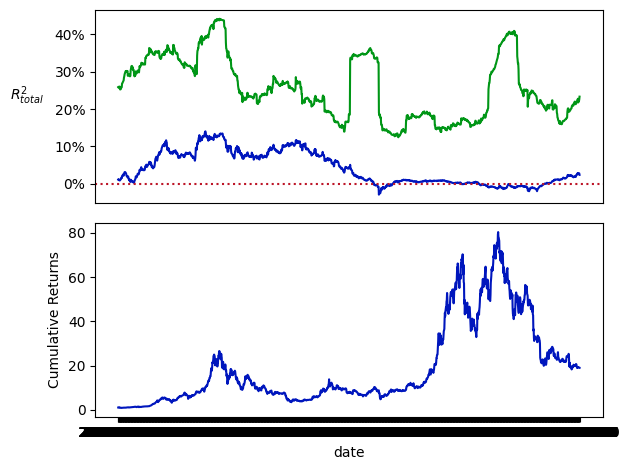

In [50]:
fig, (ax1, ax2)= plt.subplots(2)
sns.lineplot(data = performance_df, x = "day", y = "R squared total", ax = ax1, color = [0, 150/255, 22/255])
ax1.set_xlabel("")
ax1.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax1.set_xticks([])
ax1.set_ylabel("$R^2_{total}$", rotation = 0, labelpad = 20)

sns.lineplot(data = performance_df, x = "day", y = "R squared predictive", ax = ax1, color = [0, 22/255, 189/255])
ax1.axhline(0,  color = [189/255, 22/255, 40/255], linestyle = "dotted")

sns.lineplot(data = crix_data, x = "date", y = "Cumulative Returns", ax = ax2, color = [0, 22/255, 189/255])


plt.tight_layout()
plt.savefig("../Plots/Performance over time.png", transparent = True, dpi = 600)

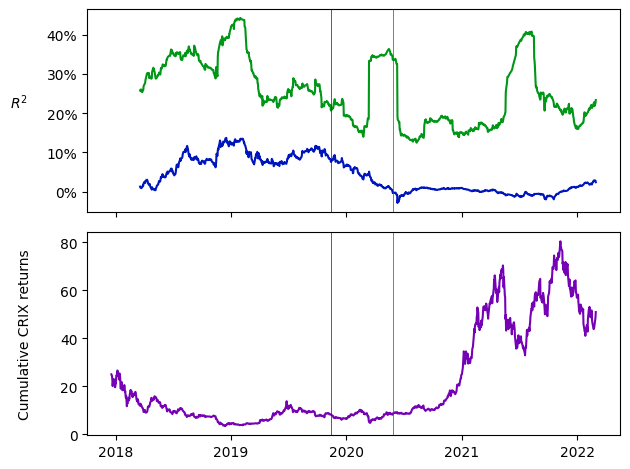

In [93]:
fig, (ax1, ax2)= plt.subplots(2, sharex = True)
sns.lineplot(data = joint_data, x = "day", y = "R squared total", ax = ax1, color = [0, 150/255, 22/255])
ax1.set_xlabel("")
ax1.yaxis.set_major_formatter(PercentFormatter(1, decimals = 0))
ax1.set_xticks([])
ax1.set_ylabel("$R^2$", rotation = 0, labelpad = 20)

sns.lineplot(data = joint_data, x = "day", y = "R squared predictive", ax = ax1, color = [0, 22/255, 189/255])


sns.lineplot(data = joint_data, x = "day", y = "Cumulative Returns", ax = ax2, color = [118 /255, 2 /255, 181 /255])
ax2.set_ylabel("Cumulative CRIX returns", labelpad = 20)
ax2.xaxis.set_major_locator(YearLocator(1))
ax2.xaxis.set_major_formatter(DateFormatter("%Y"))

ax1.axvline(x = pd.to_datetime("2019-11-15"), color = 'b', linewidth = 0.5)
ax2.axvline(x = pd.to_datetime("2019-11-15"), color = 'b', linewidth = 0.5)

ax1.axvline(x = pd.to_datetime("2020-05-27"), color = 'r', linewidth = 0.5)
ax2.axvline(x = pd.to_datetime("2020-05-27"), color = 'r', linewidth = 0.5)




plt.tight_layout()
plt.savefig("../Plots/Performance over time.png", transparent = True, dpi = 600)

# Correlation of both metrics before and after the blue line

In [97]:
np.correlate(joint_data["R squared total"][joint_data["day"] < pd.to_datetime("2019-11-15")], joint_data["R squared predictive"][joint_data["day"] < pd.to_datetime("2019-11-15")], )

array([nan])

In [96]:
joint_data

,day,R squared total,R squared predictive,returns,Cumulative Returns
0,2017-12-18,NaN,NaN,0.033217,24.961395
1,2017-12-19,NaN,NaN,-0.013785,24.617311
2,2017-12-20,NaN,NaN,-0.016084,24.221376
3,2017-12-21,NaN,NaN,-0.053258,22.931390
4,2017-12-22,NaN,NaN,-0.123719,20.094332
...,...,...,...,...,...
1116,2022-02-23,0.225265,0.026475,0.002526,43.906127
1117,2022-02-24,0.227844,0.028487,0.013222,44.486670
1118,2022-02-25,0.217986,0.027420,0.021901,45.460982
1119,2022-02-28,0.225158,0.028246,0.067069,48.510017


In [99]:
joint_data.loc[joint_data["day"] < pd.to_datetime("2019-11-15"), ["R squared total", "R squared predictive"]].corr()

,R squared total,R squared predictive
R squared total,1.000000,0.353184
R squared predictive,0.353184,1.000000


In [100]:
joint_data.loc[joint_data["day"] >= pd.to_datetime("2019-11-15"), ["R squared total", "R squared predictive"]].corr()

,R squared total,R squared predictive
R squared total,1.000000,-0.160313
R squared predictive,-0.160313,1.000000
